In [ ]:
* Top 3 observations:
    1) There is a very strong positive correlation between weight and tumor volume in the Capomulin regimen. This means the higher the weight, the more likely tumor volume will also be high. 
    2) Capomulin is showing signs of being effective in treating tumor volume. This was seen in the line plot as tumor volume decreased over time with the use of the Capomulin drug treatment. 
    3) We have a robust sample of data points across drug regimens with at least n = 150 for each regimen which is an indicator that the study was very thoroughly done. 

In [42]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"


# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)
#print(mouse_metadata)

# Combine the data into a single dataset
total_data = pd.merge(study_results,mouse_metadata,how ="left", on = "Mouse ID")
total_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [43]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
means = total_data.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
medians = total_data.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]
variances = total_data.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]
standard_devs = total_data.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]
sems = total_data.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]
summary_table = pd.DataFrame({"Mean Tumor Volume":means, 
                             "Median Tumor Volume":medians, 
                             "Variance Tumor Volume":variances,
                             "Standard Deviations Volume":standard_devs,
                             "SEM Volume":sems})
summary_table

,Mean Tumor Volume,Median Tumor Volume,Variance Tumor Volume,Standard Deviations Volume,SEM Volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


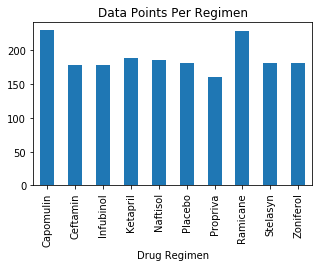

In [44]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
# Create an array that contains the number of data points each regimen has

data_points_reg = total_data.groupby("Drug Regimen").count()


# Use DataFrame.plot() in order to create a bar chart of the data
data_points_reg["Mouse ID"].plot(kind="bar", figsize=(5,3))

# Set a title for the chart
plt.title("Data Points Per Regimen")

plt.show()

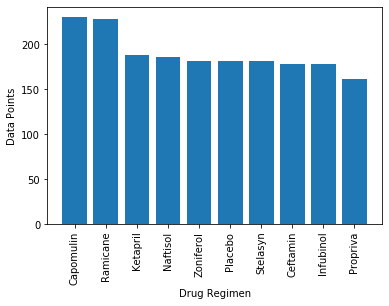

In [45]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot

counts = total_data["Drug Regimen"].value_counts()

plt.bar(counts.index.values, counts.values)
plt.xticks(rotation = 90)
plt.xlabel("Drug Regimen")
plt.ylabel("Data Points")
plt.show()

In [46]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
data_points_sex = total_data.groupby("Sex").count()
data_points_sex["Mouse ID"]

Sex
Female    935
Male      958
Name: Mouse ID, dtype: int64

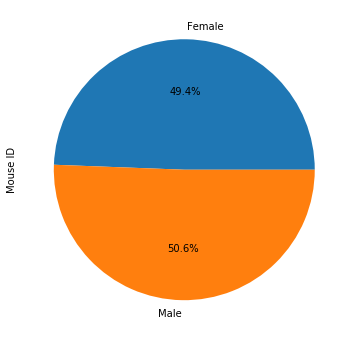

In [47]:
data_points_sex["Mouse ID"].plot(kind="pie", autopct="%1.1f%%", figsize=(10,6))
plt.show()

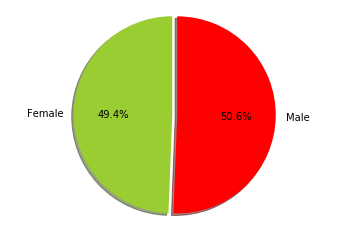

In [48]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot


sex = ["Female", "Male"]
mouse = [935, 958]
colors = ["yellowgreen", "red"]
explode = (0, 0.05)
plt.pie(mouse, explode=explode, labels=sex, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=90)
plt.axis("equal")
plt.show()

# Quartiles, Outliers, and Boxplots

In [49]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens
max_tumor = total_data.groupby(["Mouse ID"]).max()
max_tumor = max_tumor.reset_index()
#merge data with original data frame
merged_data = max_tumor[["Mouse ID","Timepoint"]].merge(total_data, on =["Mouse ID","Timepoint"],how ="left")
merged_data




,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
244,z435,10,48.710661,0,Propriva,Female,12,26
245,z578,45,30.638696,0,Ramicane,Male,11,16
246,z581,45,62.754451,3,Infubinol,Female,24,25
247,z795,45,65.741070,3,Naftisol,Female,13,29


In [50]:
#calculate the quartiles
#tumor volume for each drug regmem, then calculate quartiles then calculate the outliers.topreg = merged_data.groupby(["Drug Regimen"]).count()
#capdf = merged_data.loc["Capumulin"]
#named_capumulin = merged_data["Drug Regimen"] == "Infubinol"
#named_capumulin.head()

capomulin = merged_data.loc[merged_data["Drug Regimen"] == "Capomulin"]['Tumor Volume (mm3)']
capomulin

19     38.982878
24     38.939633
61     30.485985
64     37.074024
66     40.159220
81     47.685963
84     37.311846
86     38.125164
88     38.753265
109    41.483008
116    38.846876
122    28.430964
125    33.329098
163    46.539206
164    32.377357
170    41.581521
175    23.343598
181    40.728578
184    34.455298
193    31.023923
205    40.658124
209    39.952347
221    36.041047
227    28.484033
240    31.896238
Name: Tumor Volume (mm3), dtype: float64

In [51]:
#only_Ramicane = merged_data.loc[merged_data["Drug Regimen"] == "Ramicane", :]
#only_Ramicane

Ramicane = merged_data.loc[merged_data["Drug Regimen"] == "Ramicane"]['Tumor Volume (mm3)']
Ramicane

6      38.407618
7      43.047543
10     38.810366
12     32.978522
33     38.342008
37     33.397653
45     37.311236
52     40.659006
70     29.128472
77     33.562402
78     36.374510
92     31.560470
94     36.134852
97     22.050126
120    30.564625
127    31.095335
158    45.220869
159    36.561652
167    37.225650
169    43.419381
178    30.276232
191    40.667713
218    43.166373
236    44.183451
245    30.638696
Name: Tumor Volume (mm3), dtype: float64

In [52]:
Infubinol = merged_data.loc[merged_data["Drug Regimen"] == "Infubinol"]['Tumor Volume (mm3)']
Infubinol

0      67.973419
1      65.525743
11     57.031862
13     66.083066
27     72.226731
31     36.321346
41     60.969711
50     62.435404
56     60.918767
79     67.289621
98     66.196912
102    62.117279
124    47.010364
130    60.165180
142    55.629428
143    45.699331
154    54.656549
171    55.650681
198    46.250112
201    54.048608
203    51.542431
212    50.005138
217    58.268442
234    67.685569
246    62.754451
Name: Tumor Volume (mm3), dtype: float64

In [53]:
#only_Ceftamin = merged_data.loc[merged_data["Drug Regimen"] == "Ceftamin", :]
#only_Ceftamin

Ceftamin = merged_data.loc[merged_data["Drug Regimen"] == "Ceftamin"]['Tumor Volume (mm3)']
Ceftamin

3      62.999356
21     45.000000
22     56.057749
25     55.742829
58     48.722078
76     47.784682
89     61.849023
95     68.923185
107    67.748662
108    57.918381
110    46.784535
111    59.851956
114    64.299830
135    59.741901
151    61.433892
155    64.192341
185    45.000000
189    52.925348
190    45.000000
210    67.527482
224    45.000000
229    64.634949
232    61.386660
239    68.594745
241    64.729837
Name: Tumor Volume (mm3), dtype: float64

In [54]:
capomulin_quart = capomulin.quantile([.25,.5,.75])
capomulin_lowerq = capomulin_quart[0.25]
capomulin_upperq = capomulin_quart[0.75]
capomulin_iqr = capomulin_upperq-capomulin_lowerq

print(f"The lower quartile of Capomulin is: {capomulin_lowerq}")
print(f"The upper quartile of Capomulin is: {capomulin_upperq}")
print(f"The interquartile range of Capomulin is: {capomulin_iqr}")
print(f"The the median of Capomulin is: {capomulin_quart[0.5]} ")

lower_bound = capomulin_lowerq - (1.5*capomulin_iqr)
upper_bound = capomulin_upperq + (1.5*capomulin_iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Capomulin is: 32.37735684
The upper quartile of Capomulin is: 40.1592203
The interquartile range of Capomulin is: 7.781863460000004
The the median of Capomulin is: 38.125164399999996 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


In [55]:
Ramicane_quart = Ramicane.quantile([.25,.5,.75])
Ramicane_lowerq = Ramicane_quart[0.25]
Ramicane_upperq = Ramicane_quart[0.75]
Ramicane_iqr = Ramicane_upperq-capomulin_lowerq

print(f"The lower quartile of Ramicane is: {Ramicane_lowerq}")
print(f"The upper quartile of Ramicane is: {Ramicane_upperq}")
print(f"The interquartile range of Ramicane is: {Ramicane_iqr}")
print(f"The the median of Ramicane is: {Ramicane_quart[0.5]} ")

lower_bound = Ramicane_lowerq - (1.5*Ramicane_iqr)
upper_bound = Ramicane_upperq + (1.5*Ramicane_iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Ramicane is: 31.56046955
The upper quartile of Ramicane is: 40.65900627
The interquartile range of Ramicane is: 8.281649430000002
The the median of Ramicane is: 36.56165229 
Values below 19.137995404999998 could be outliers.
Values above 53.081480415 could be outliers.


In [56]:
Infubinol_quart = Infubinol.quantile([.25,.5,.75])
Infubinol_lowerq = Infubinol_quart[0.25]
Infubinol_upperq = Infubinol_quart[0.75]
Infubinol_iqr = Infubinol_upperq-capomulin_lowerq

print(f"The lower quartile of Infubinol is: {Infubinol_lowerq}")
print(f"The upper quartile of Infubinol is: {Infubinol_upperq}")
print(f"The interquartile range of Infubinol is: {Infubinol_iqr}")
print(f"The the median of Infubinol is: {Infubinol_quart[0.5]} ")

lower_bound = Infubinol_lowerq - (1.5*Infubinol_iqr)
upper_bound = Infubinol_upperq + (1.5*Infubinol_iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Infubinol is: 54.04860769
The upper quartile of Infubinol is: 65.52574285
The interquartile range of Infubinol is: 33.14838601
The the median of Infubinol is: 60.16518046 
Values below 4.326028674999989 could be outliers.
Values above 115.24832186500001 could be outliers.


In [57]:
Ceftamin_quart = Ceftamin.quantile([.25,.5,.75])
Ceftamin_lowerq = Ceftamin_quart[0.25]
Ceftamin_upperq = Ceftamin_quart[0.75]
Ceftamin_iqr = Ceftamin_upperq-capomulin_lowerq

print(f"The lower quartile of Ceftamin is: {Ceftamin_lowerq}")
print(f"The upper quartile of Ceftamin is: {Ceftamin_upperq}")
print(f"The interquartile range of Ceftamin is: {Ceftamin_iqr}")
print(f"The the median of Ceftamin is: {Ceftamin_quart[0.5]} ")

lower_bound = Ceftamin_lowerq - (1.5*Ceftamin_iqr)
upper_bound = Ceftamin_upperq + (1.5*Ceftamin_iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Ceftamin is: 48.72207785
The upper quartile of Ceftamin is: 64.29983003
The interquartile range of Ceftamin is: 31.922473189999998
The the median of Ceftamin is: 59.85195552 
Values below 0.8383680650000045 could be outliers.
Values above 112.18353981499999 could be outliers.


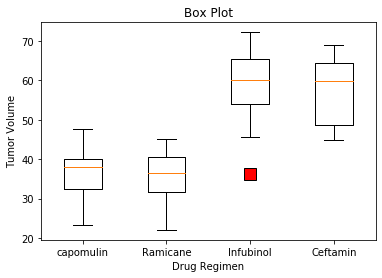

In [58]:

flierprops = dict(marker='s', markerfacecolor='r', markersize=12)
plt.boxplot([capomulin,Ramicane, Infubinol, Ceftamin],
            labels=["capomulin","Ramicane", "Infubinol", "Ceftamin"],
            flierprops=flierprops);
plt.ylabel("Tumor Volume")
plt.xlabel("Drug Regimen")
plt.title("Box Plot")
plt.show()

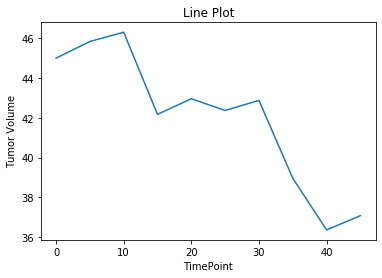

In [59]:
drug_df = total_data.loc[total_data["Drug Regimen"] == "Capomulin"]
mouse_data = drug_df.loc[drug_df["Mouse ID"]== "g288"]
plt.plot(mouse_data['Timepoint'],mouse_data['Tumor Volume (mm3)']);
plt.ylabel("Tumor Volume")
plt.xlabel("TimePoint")
plt.title("Line Plot")
plt.show()

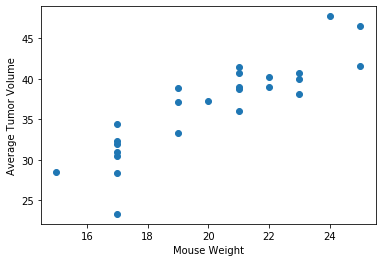

In [60]:
capomulin2 = merged_data.loc[merged_data["Drug Regimen"] == "Capomulin"]
avgcapomulin = capomulin2.groupby("Mouse ID").mean()
plt.scatter(avgcapomulin["Weight (g)"], avgcapomulin["Tumor Volume (mm3)"])
plt.xlabel ("Mouse Weight")
plt.ylabel ("Average Tumor Volume")
plt.show()

In [61]:
x_values = avgcapomulin["Weight (g)"]
y_values = avgcapomulin["Tumor Volume (mm3)"]
correlation = round(st.pearsonr(x_values, y_values)[0],2)
print(f"The average correlations between weight and tumor volume is {correlation}")

The average correlations between weight and tumor volume is 0.88


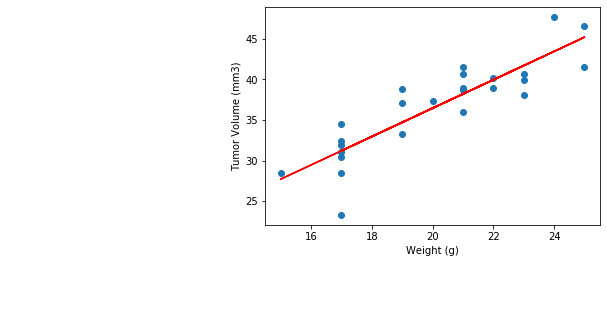

In [62]:
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(6,10), fontsize = 15, color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()